1. Find YouTube link of a song.
2. Convert and download mp3: https://ytmp3s.nu/
3. Extract and download vocal only: https://ultimatevocalremover.com/
4. Upload vocal file below. Change the file name in the code.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 1_Miley Cyrus - Party In The U.S.A. (Official Video)_(Vocals).mp3 to 1_Miley Cyrus - Party In The U.S.A. (Official Video)_(Vocals).mp3


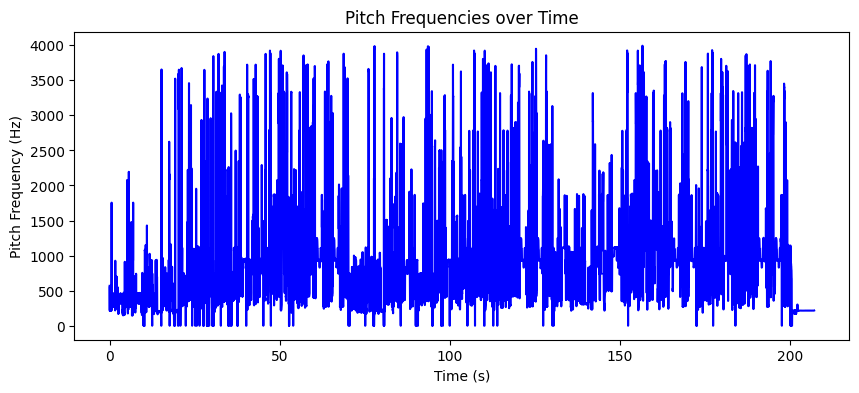

,SD,AvgRollDiff,AvgSD5,AvgSD10,AvgSD20,AvgSD50,AvgSD100
0,777.802185,244.849335,301.798248,424.381042,516.714355,606.608826,654.548279


In [ ]:
# Import libraries
import librosa
import librosa.display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the audio file
audio_file = '1_Miley Cyrus - Party In The U.S.A. (Official Video)_(Vocals).mp3'  # Replace with file name
y, sr = librosa.load(audio_file)

# Extract pitches
pitches, magnitudes = librosa.piptrack(y=y, sr=sr)
max_indexes = np.argmax(magnitudes, axis=0)
# Get the pitches of the max indexes per time slice
pitches = pitches[max_indexes, range(magnitudes.shape[1])]

# Create a time array corresponding to the frame index
times = librosa.frames_to_time(np.arange(len(pitches)))

# Plot the pitch frequencies over time
plt.figure(figsize=(10, 4))
plt.plot(times, pitches, color='b')
plt.title('Pitch Frequencies over Time')
plt.xlabel('Time (s)')
plt.ylabel('Pitch Frequency (Hz)')
plt.show()

pitches = pitches[pitches != 0]

def average_std_deviation_subarrays(array, subarray_size):
    # Calculate the number of sub-arrays
    num_subarrays = len(array) - subarray_size + 1

    # Initialize an empty list to store standard deviations
    std_deviations = []

    # Iterate through each sub-array
    for i in range(num_subarrays):
        sub_array = array[i:i+subarray_size]
        std_deviation = np.std(sub_array)
        std_deviations.append(std_deviation)

    # Calculate the average standard deviation
    average_std_deviation = np.mean(std_deviations)

    return average_std_deviation


# Calculate variables
standard_deviation = np.std(pitches)
average_rolling_difference = np.mean(abs(np.diff(pitches)))
avg_sd5 = average_std_deviation_subarrays(pitches, 5)
avg_sd10 = average_std_deviation_subarrays(pitches, 10)
avg_sd20 = average_std_deviation_subarrays(pitches, 20)
avg_sd50 = average_std_deviation_subarrays(pitches, 50)
avg_sd100 = average_std_deviation_subarrays(pitches, 100)

# Create a DataFrame
data = {
    "SD": standard_deviation,
    "AvgRollDiff": average_rolling_difference,
    "AvgSD5": avg_sd5,
    "AvgSD10": avg_sd10,
    "AvgSD20": avg_sd20,
    "AvgSD50": avg_sd50,
    "AvgSD100": avg_sd100
}
df = pd.DataFrame(data, index=[0])
df

**Copy and paste this entire row into the spreadsheet.**